In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
   #  1.  fLength:  continuous  # major axis of ellipse [mm]
   #  2.  fWidth:   continuous  # minor axis of ellipse [mm] 
   #  3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
   #  4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
   #  5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
   #  6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
   #  7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
   #  8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
   #  9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   # 10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   # 11.  class:    g,h         # gamma (signal), hadron (background)

   # g = gamma (signal):     12332
   # h = hadron (background): 6688

In [3]:
# Data Link = https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [4]:
col=["fLength","fWidth","fSize","fConc","fConc1","fAsym","M3Long","M3Trans","fAlpha","fDist","Class"]

In [5]:
df = pd.read_csv(r"S:\Machine\magic+gamma+telescope\magic04.data", names=col)          

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym   M3Long  M3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

    fAlpha     fDist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df["Class"].unique()

array(['g', 'h'], dtype=object)

In [8]:
df["Class"]=(df["Class"]=="g").astype(int)   # g = 1 & h = 0

In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym   M3Long  M3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

    fAlpha     fDist  Class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

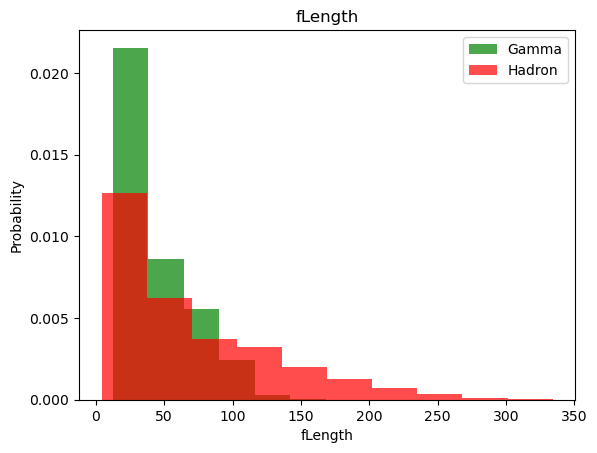

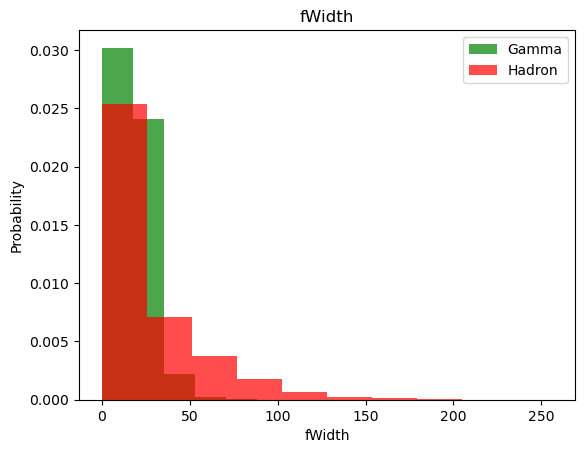

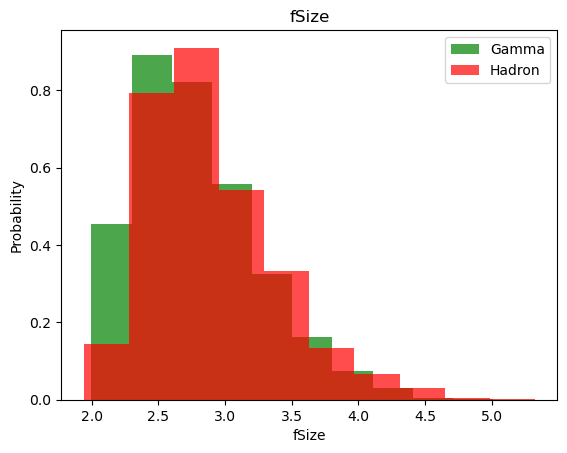

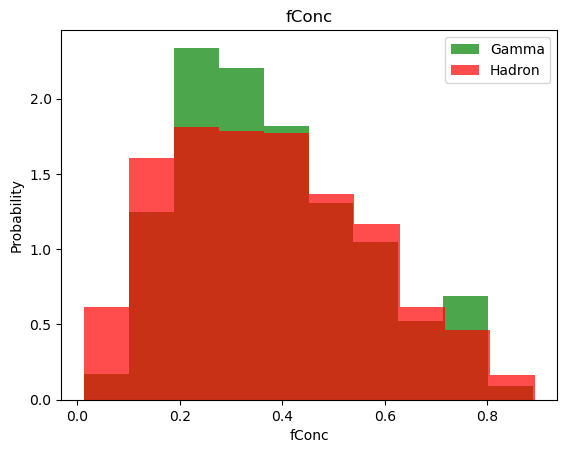

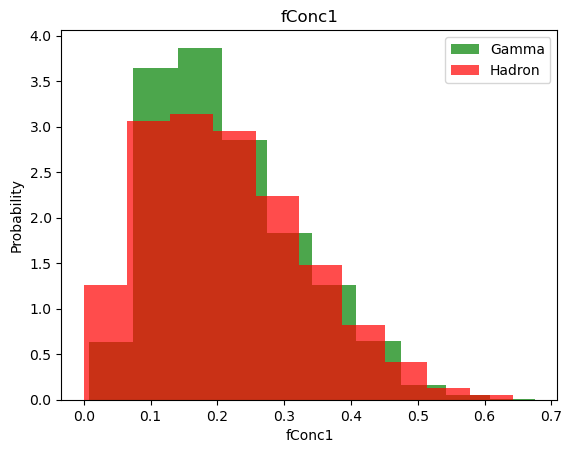

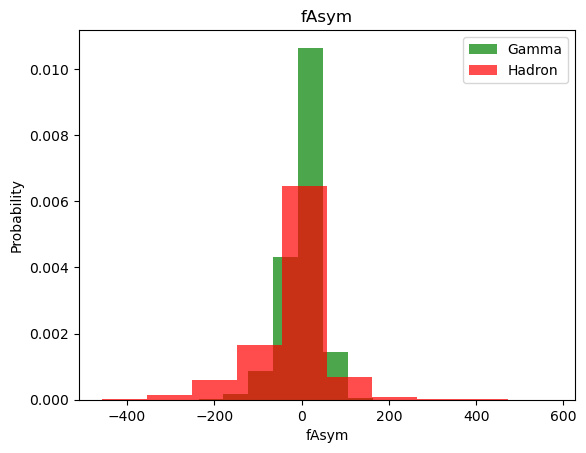

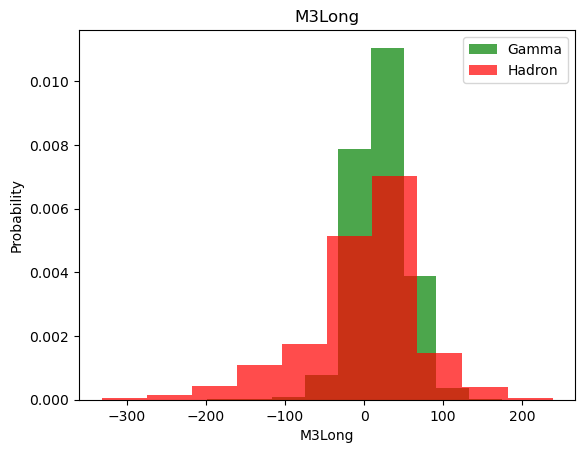

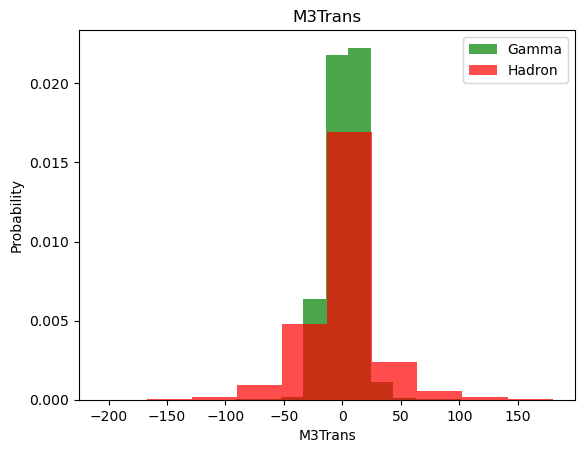

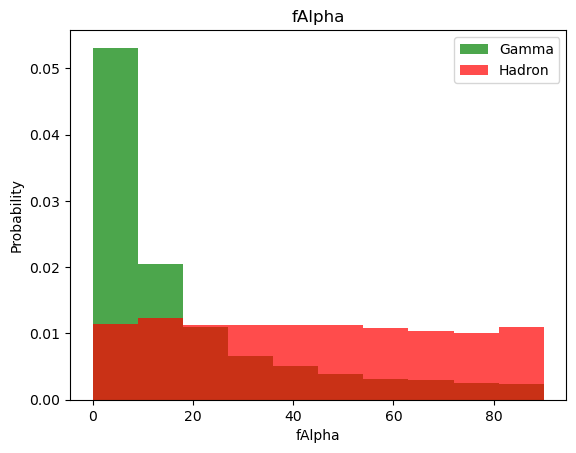

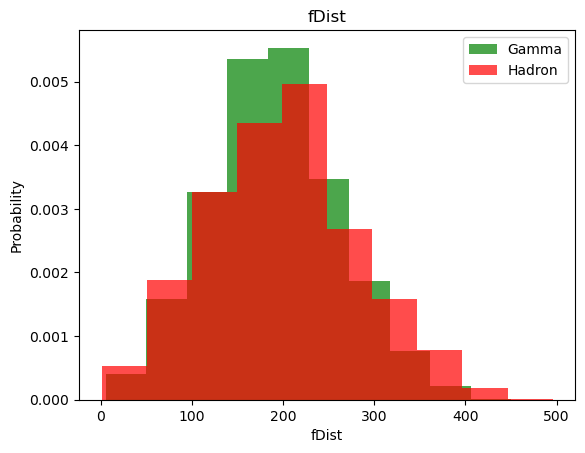

In [10]:
for label in col[:-1]:
    plt.hist(df[df["Class"]==1][label],color="green",label="Gamma",alpha=.7,density=True)
    plt.hist(df[df["Class"]==0][label],color="red",label="Hadron",alpha=.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

In [11]:
# Train , Validation and Test

In [12]:
train, valid, test = np.split(df.sample(frac=1, random_state=42).reset_index(drop=True),[int(0.6*len(df)), int(0.8*len(df))])

C:\Users\Asus\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def scale_dataset(dataframe, oversample=False):
    # Select features (all columns except last)
    x = dataframe[dataframe.columns[:-1]].values

    # Select target (last column)
    y = dataframe[dataframe.columns[-1]].values

    # Optional oversampling
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    # Scale features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Combine scaled features and target
    data = np.hstack([x, y.reshape(-1, 1)])

    return data, x, y

In [14]:
# Scale training set and apply oversampling
train, x_train, y_train = scale_dataset(train, oversample=True)

In [15]:
len(y_train)

14818

In [16]:
sum(y_train==1) # Gamma/g

7409

In [17]:
sum(y_train==0) # hadron/h

7409

In [18]:
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [19]:
# kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred=knn_model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [24]:
# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred=nb_model.predict(x_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52      1331
           1       0.74      0.83      0.78      2473

    accuracy                           0.70      3804
   macro avg       0.67      0.64      0.65      3804
weighted avg       0.69      0.70      0.69      3804



In [29]:
# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=lr_model.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1331
           1       0.85      0.75      0.80      2473

    accuracy                           0.76      3804
   macro avg       0.74      0.76      0.74      3804
weighted avg       0.77      0.76      0.76      3804



In [34]:
# Support Vector Machine

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [37]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1331
           1       0.90      0.84      0.87      2473

    accuracy                           0.84      3804
   macro avg       0.82      0.84      0.83      3804
weighted avg       0.85      0.84      0.84      3804



In [38]:
# Neural Network

In [39]:
import tensorflow as tf

In [40]:
# Function to plot loss and accuracy together
def plot_history(history):

    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # ---- Loss plot ----
    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    # ---- Accuracy plot ----
    ax2.plot(history.history['accuracy'], label='train_accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Display the plots
    plt.show()

In [41]:
import tensorflow as tf

# Function to build, compile, and train a neural network model
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, bs, epochs):
    
    # Create a Sequential neural network
    nn_model = tf.keras.Sequential([
        
        # First hidden layer
        # num_nodes    → number of neurons
        # relu         → activation function
        # input_shape  → number of features in training data
        tf.keras.layers.Dense(
            num_nodes,
            activation='relu',
            input_shape=(x_train.shape[1],)
        ),
        
        # Dropout layer
        # Randomly drops a fraction of neurons to reduce overfitting
        tf.keras.layers.Dropout(dropout_prob),
        
        # Second hidden layer
        # Adds more learning capacity to the model
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        
        # Dropout layer again for regularization
        tf.keras.layers.Dropout(dropout_prob),
        
        # Output layer
        # Single neuron with sigmoid activation for binary classification
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Controls weight updates
        loss='binary_crossentropy',                             # Loss for binary targets
        metrics=['accuracy']                                    # Tracks model accuracy
    )

    # Train the model
    # validation_split=0.2 means 20% of training data is used for validation
    history = nn_model.fit(
        x_train,           # Training features
        y_train,           # Training labels
        epochs=epochs,     # Number of complete passes through the dataset
        batch_size=bs,     # Samples per weight update
        validation_split=0.2,
        verbose=0          # Suppress training output
    )

    # Return the trained model and training history
    return nn_model, history

nodes=16, dropout=0.0, lr=0.01, batch_size=32


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


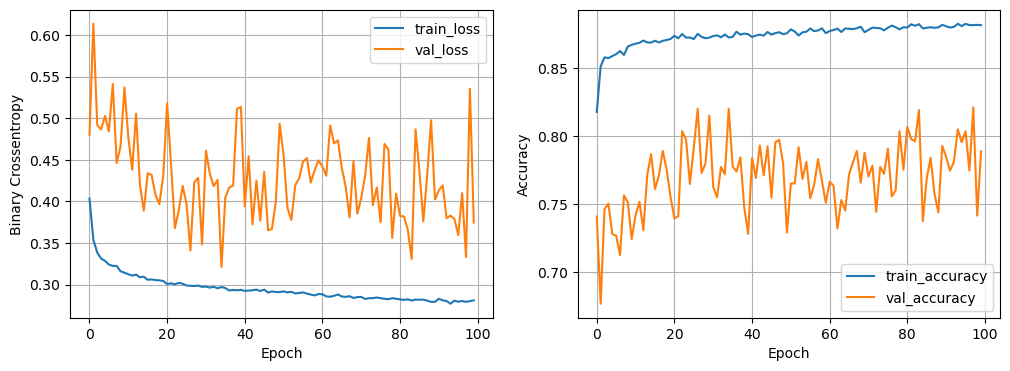

nodes=16, dropout=0.0, lr=0.01, batch_size=64


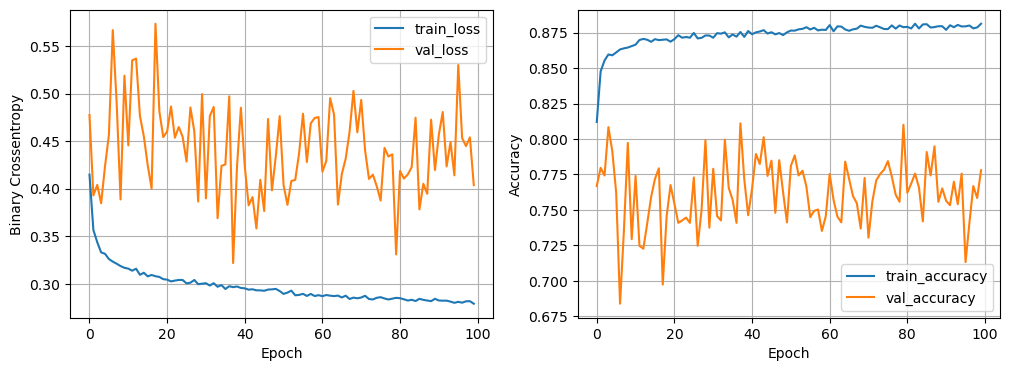

nodes=16, dropout=0.0, lr=0.01, batch_size=128


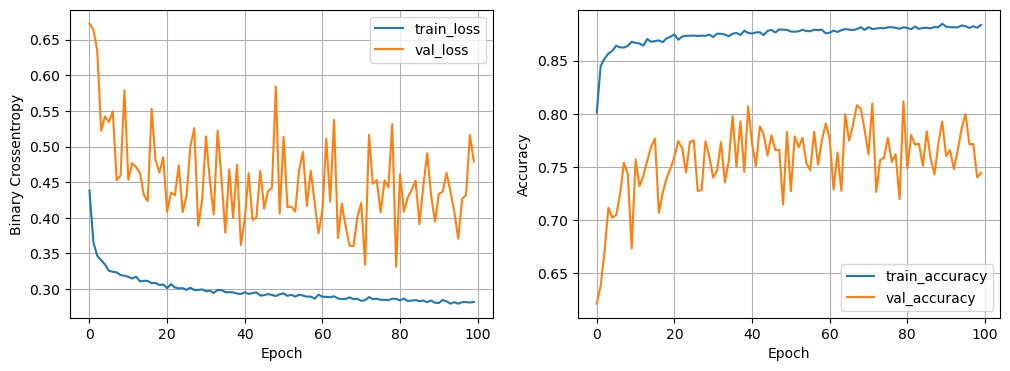

nodes=16, dropout=0.0, lr=0.005, batch_size=32


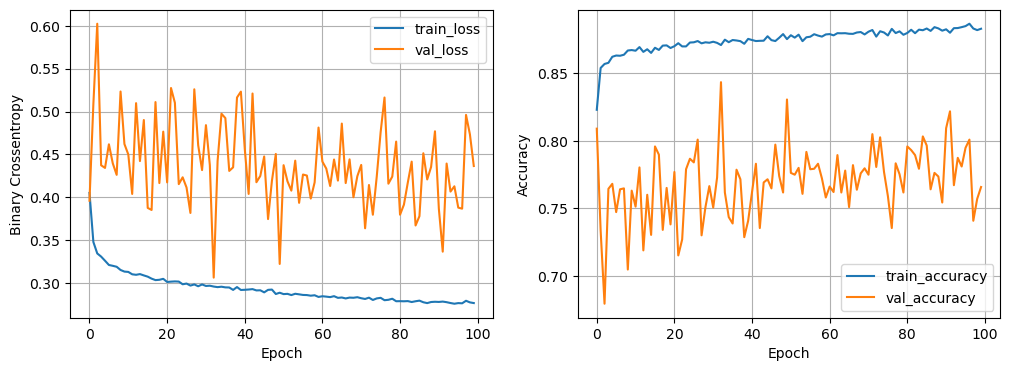

nodes=16, dropout=0.0, lr=0.005, batch_size=64


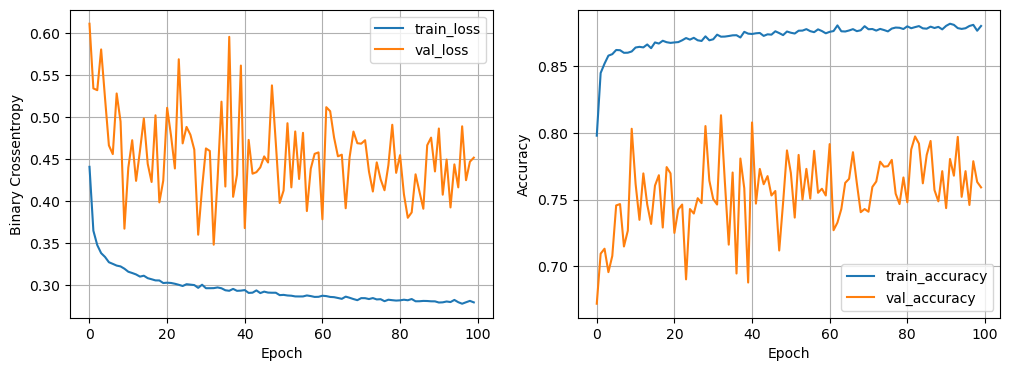

nodes=16, dropout=0.0, lr=0.005, batch_size=128


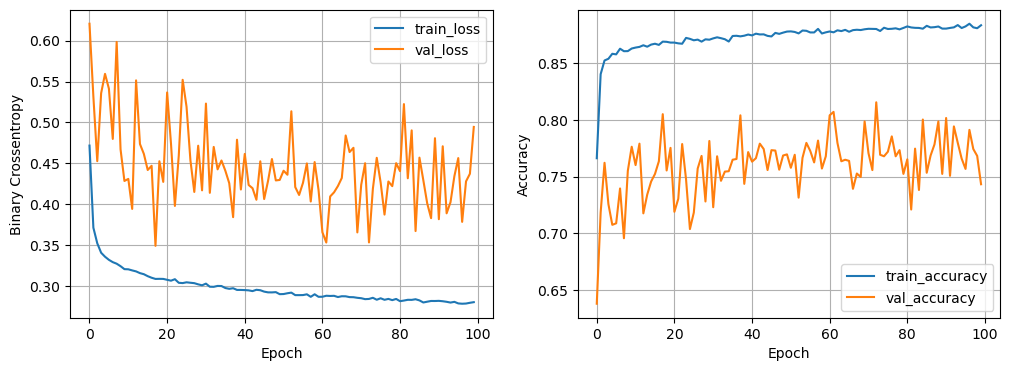

nodes=16, dropout=0.0, lr=0.001, batch_size=32


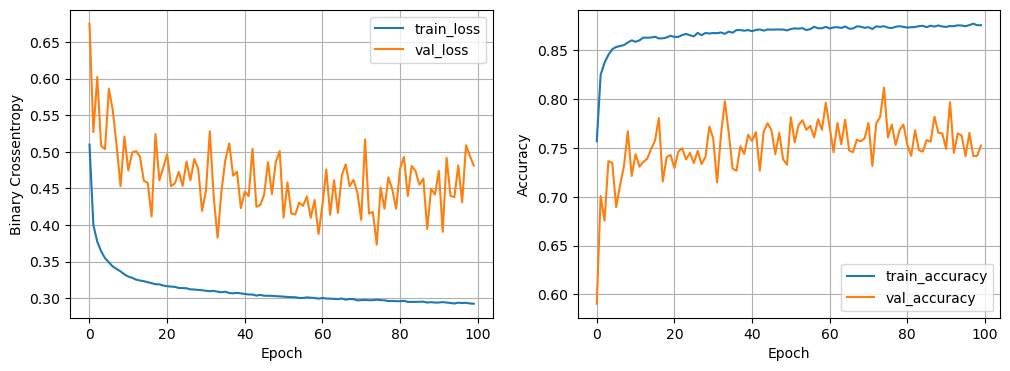

nodes=16, dropout=0.0, lr=0.001, batch_size=64


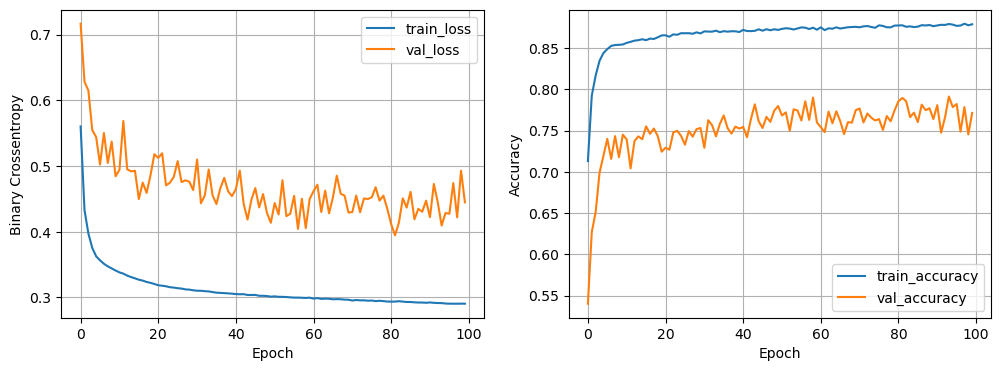

nodes=16, dropout=0.0, lr=0.001, batch_size=128


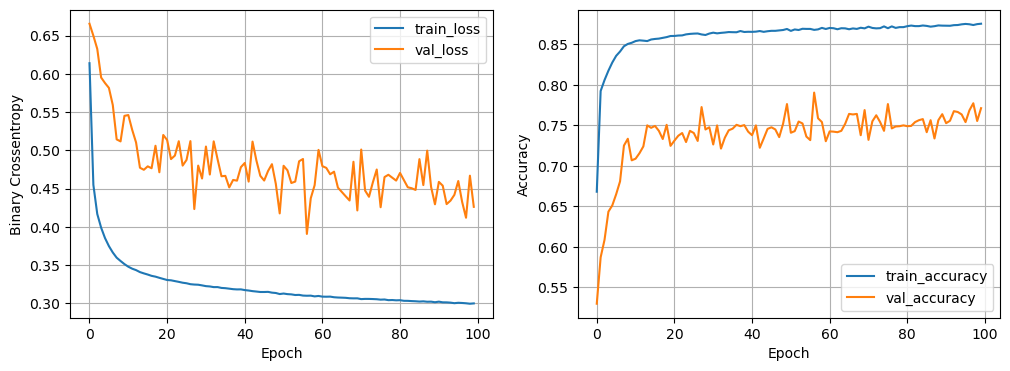

nodes=16, dropout=0.2, lr=0.01, batch_size=32


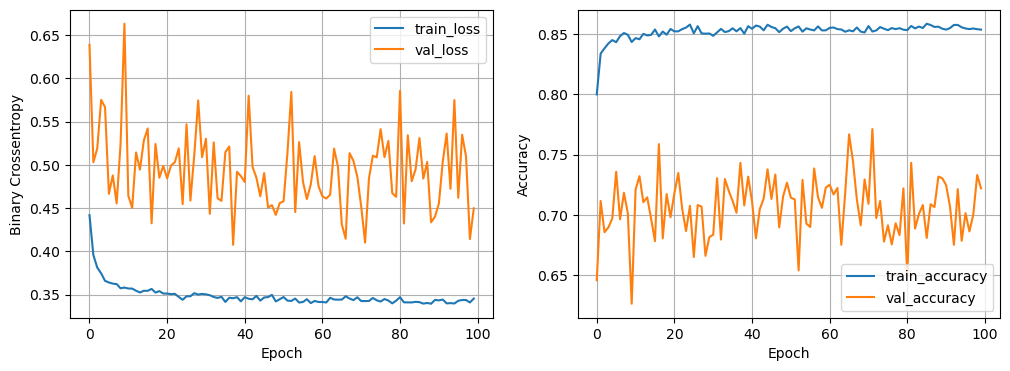

nodes=16, dropout=0.2, lr=0.01, batch_size=64


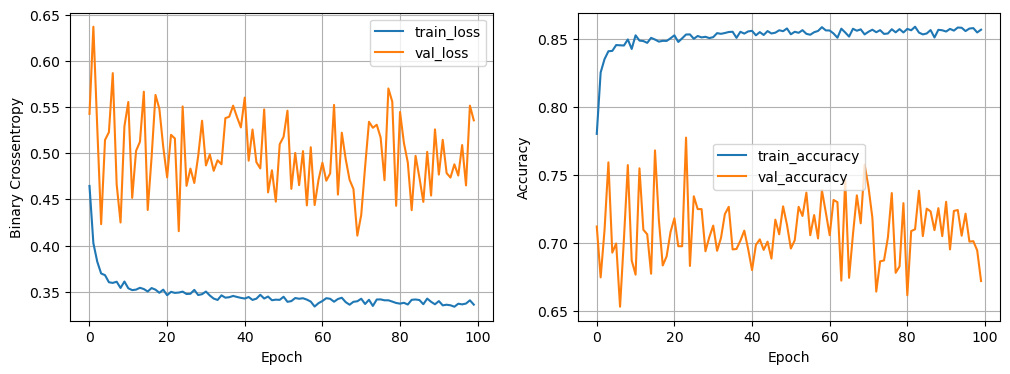

nodes=16, dropout=0.2, lr=0.01, batch_size=128


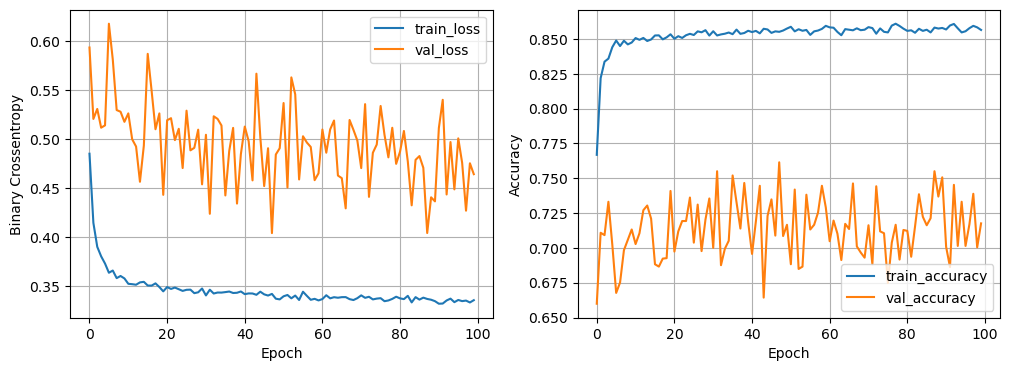

nodes=16, dropout=0.2, lr=0.005, batch_size=32


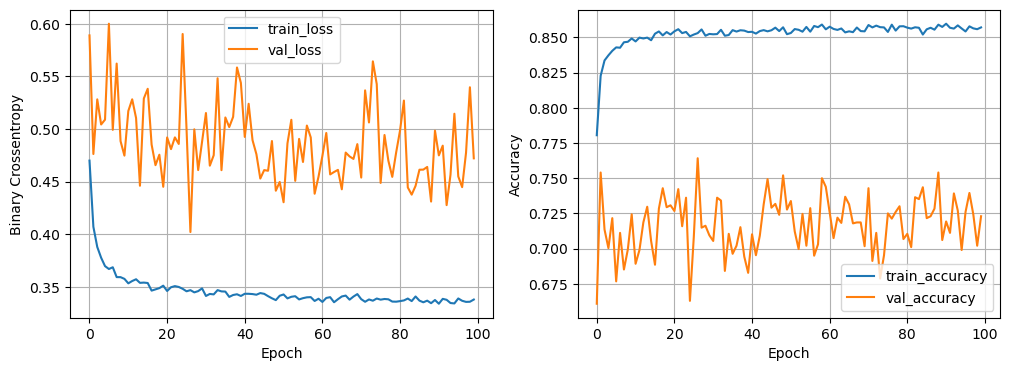

nodes=16, dropout=0.2, lr=0.005, batch_size=64


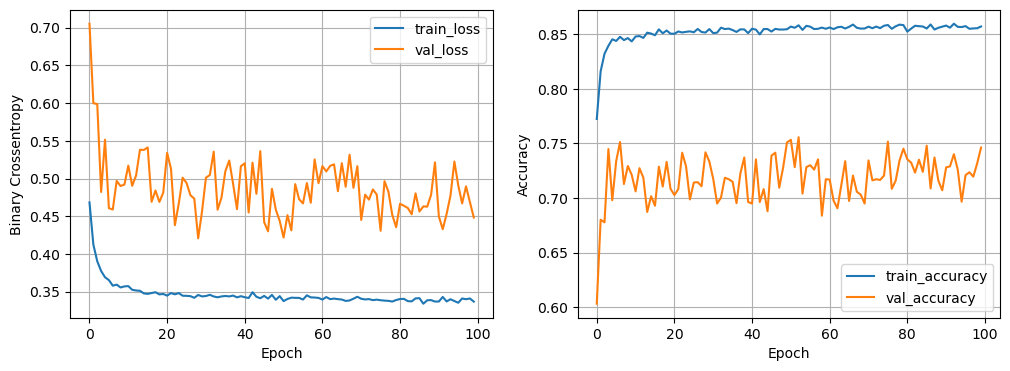

nodes=16, dropout=0.2, lr=0.005, batch_size=128


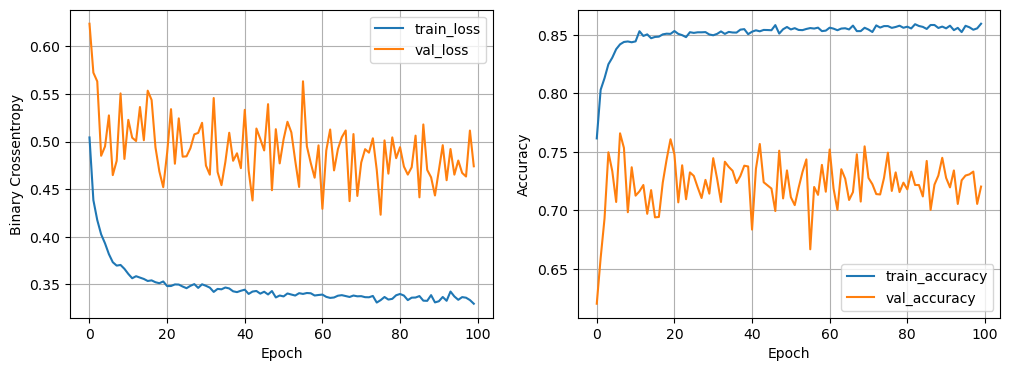

nodes=16, dropout=0.2, lr=0.001, batch_size=32


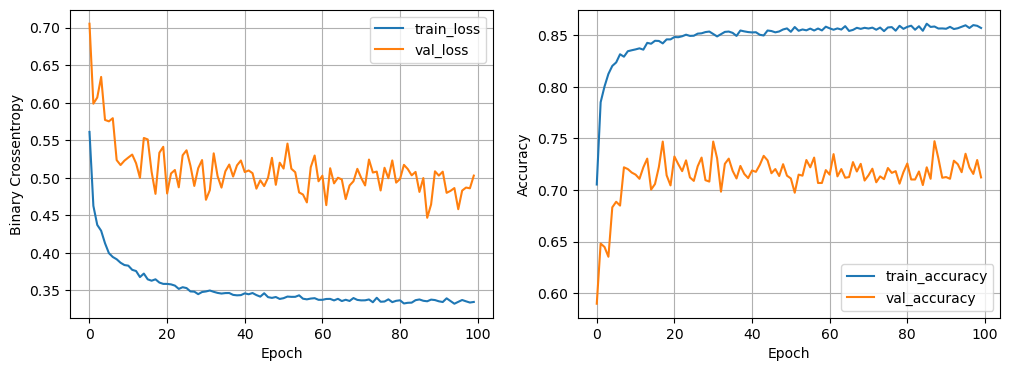

nodes=16, dropout=0.2, lr=0.001, batch_size=64


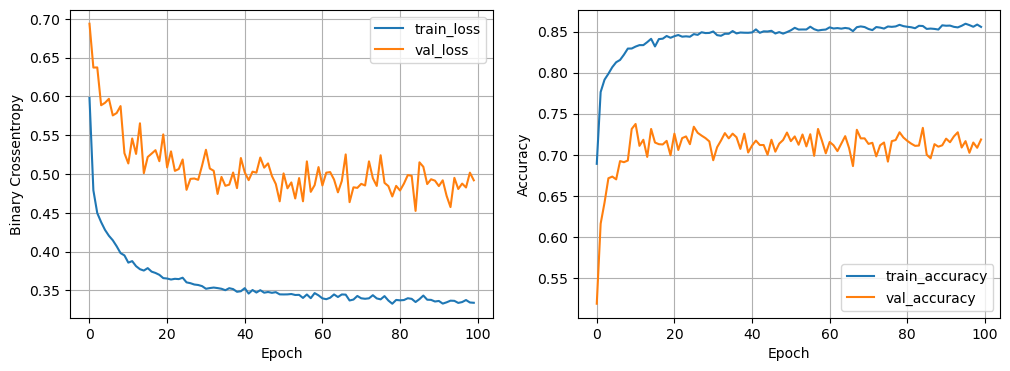

nodes=16, dropout=0.2, lr=0.001, batch_size=128


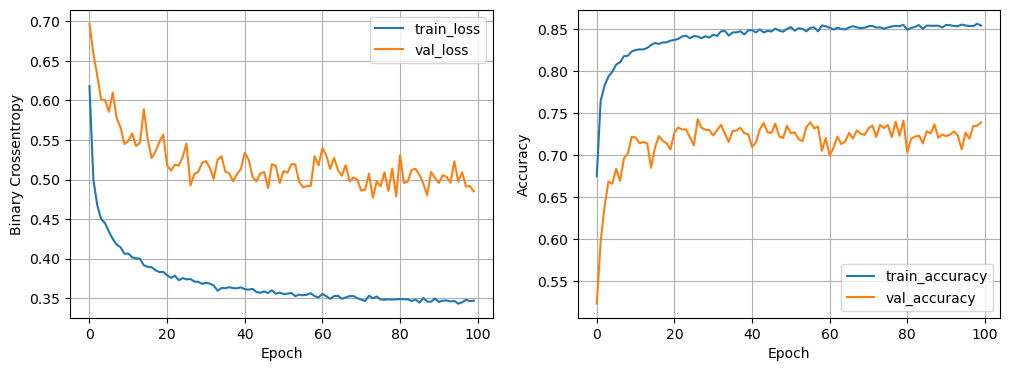

nodes=32, dropout=0.0, lr=0.01, batch_size=32


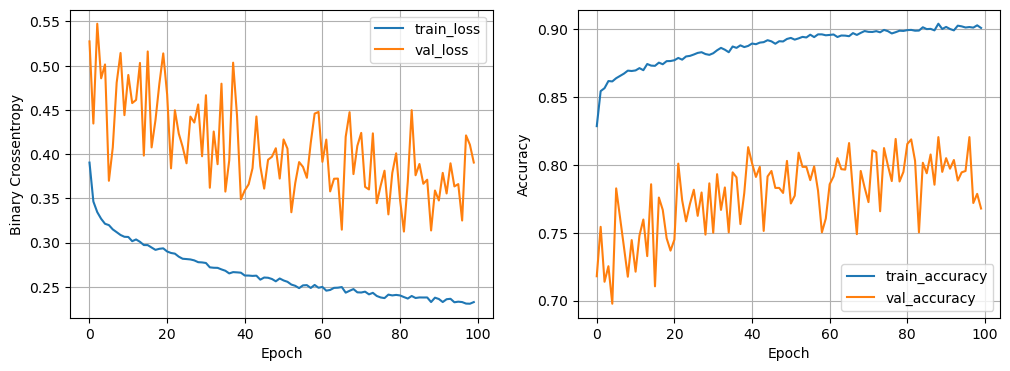

nodes=32, dropout=0.0, lr=0.01, batch_size=64


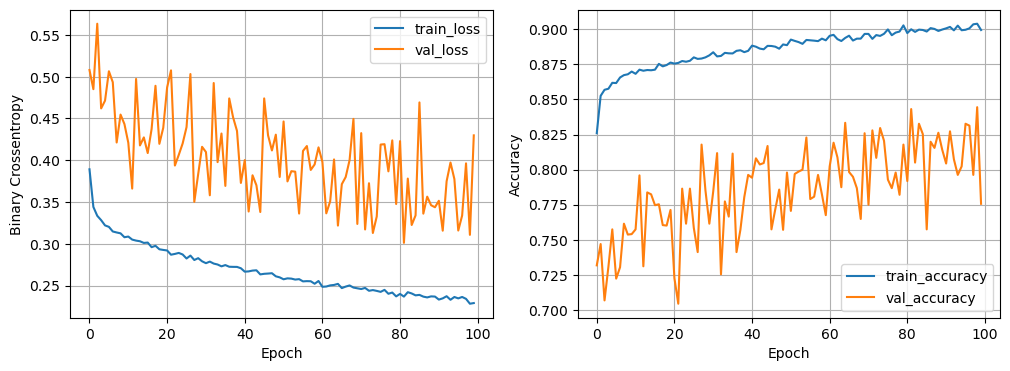

nodes=32, dropout=0.0, lr=0.01, batch_size=128


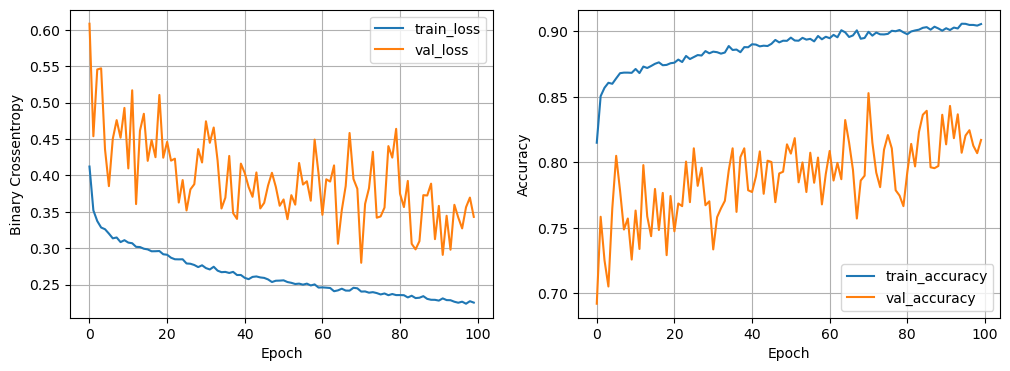

nodes=32, dropout=0.0, lr=0.005, batch_size=32


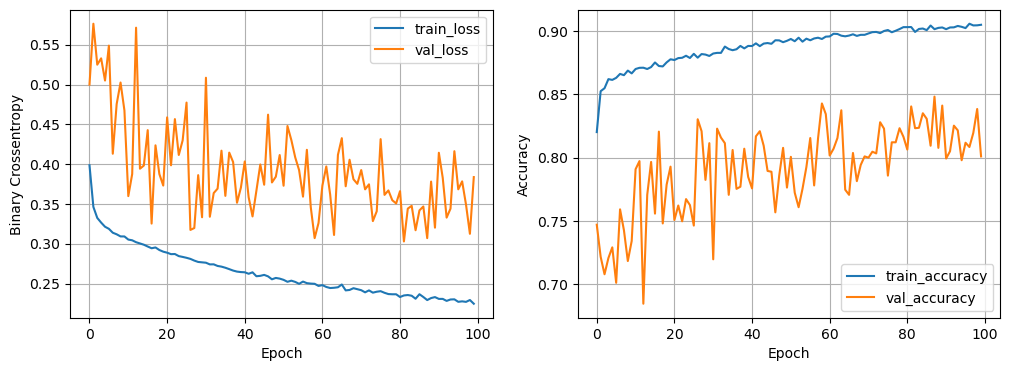

nodes=32, dropout=0.0, lr=0.005, batch_size=64


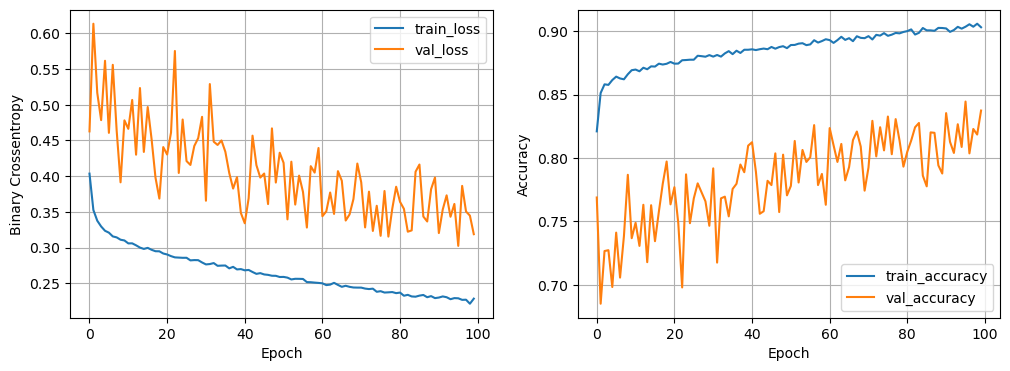

nodes=32, dropout=0.0, lr=0.005, batch_size=128


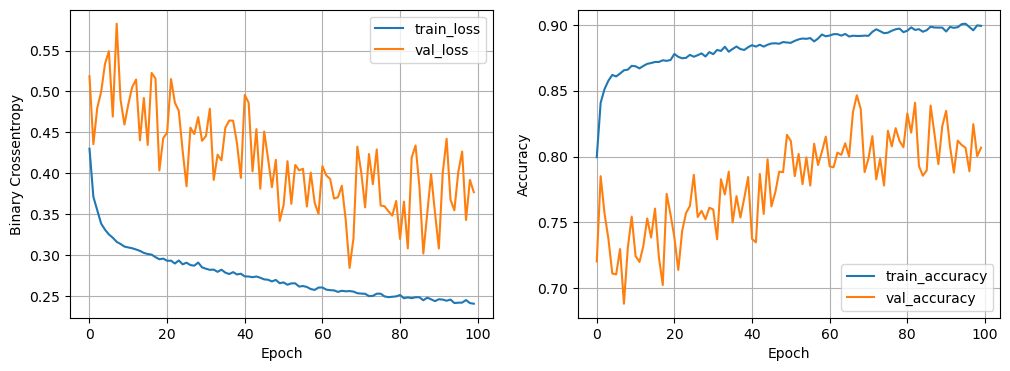

nodes=32, dropout=0.0, lr=0.001, batch_size=32


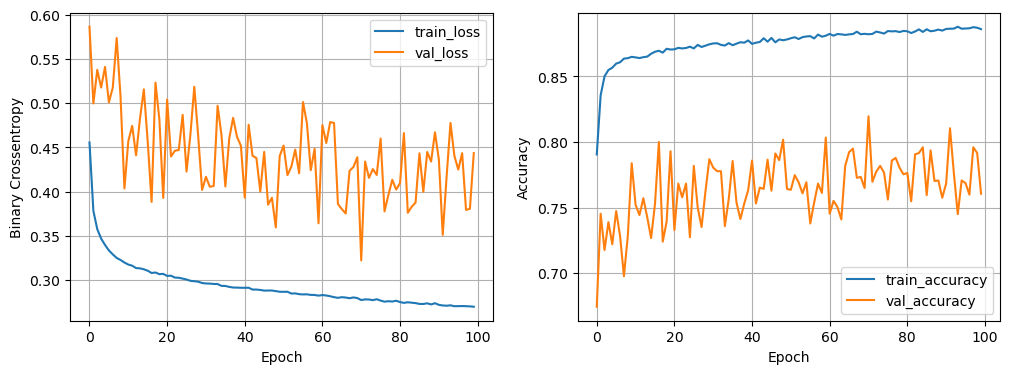

nodes=32, dropout=0.0, lr=0.001, batch_size=64


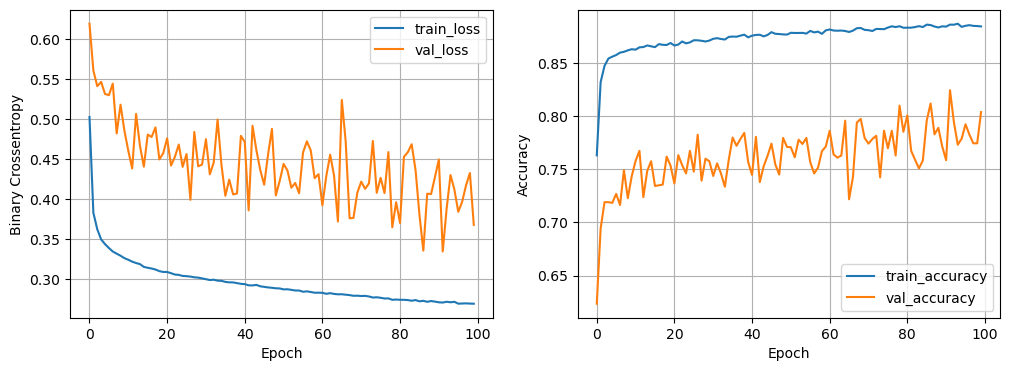

nodes=32, dropout=0.0, lr=0.001, batch_size=128


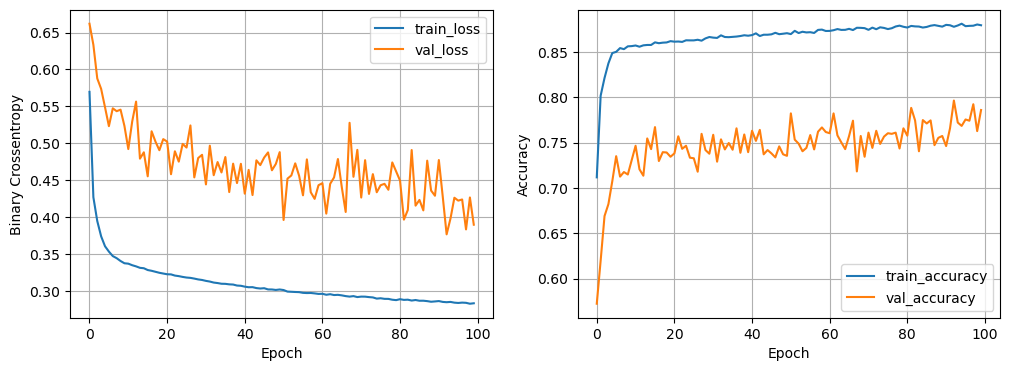

nodes=32, dropout=0.2, lr=0.01, batch_size=32


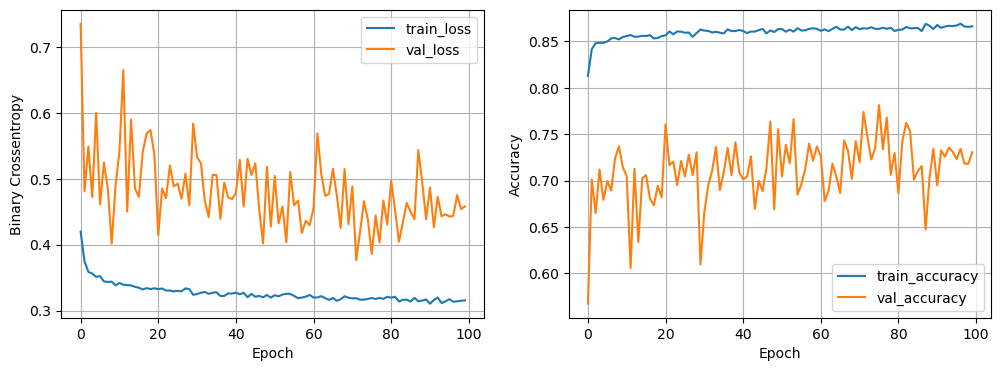

nodes=32, dropout=0.2, lr=0.01, batch_size=64


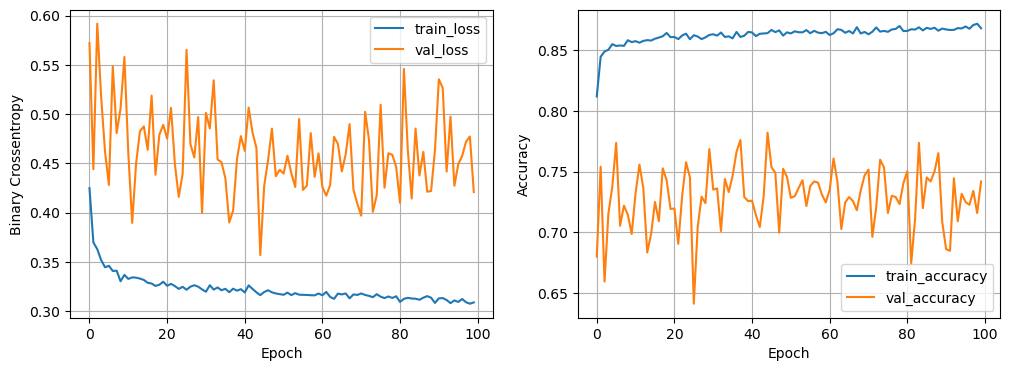

nodes=32, dropout=0.2, lr=0.01, batch_size=128


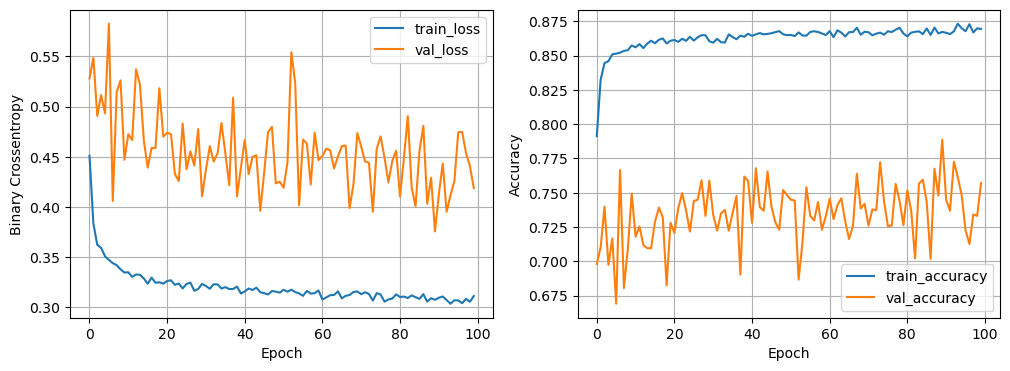

nodes=32, dropout=0.2, lr=0.005, batch_size=32


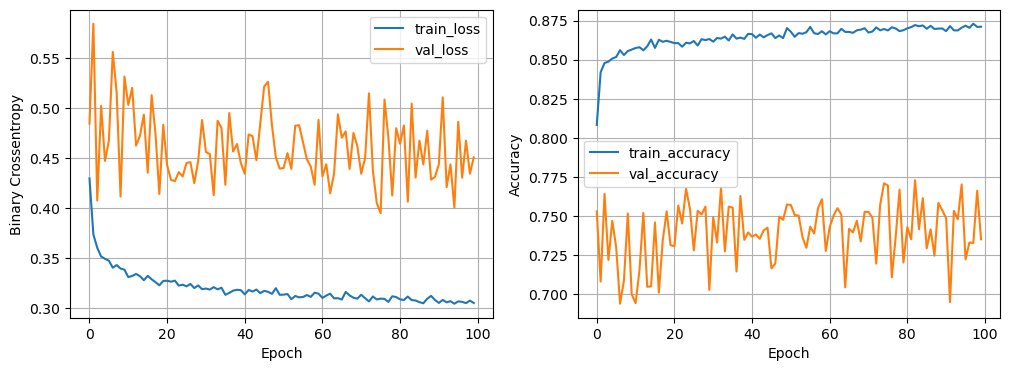

nodes=32, dropout=0.2, lr=0.005, batch_size=64


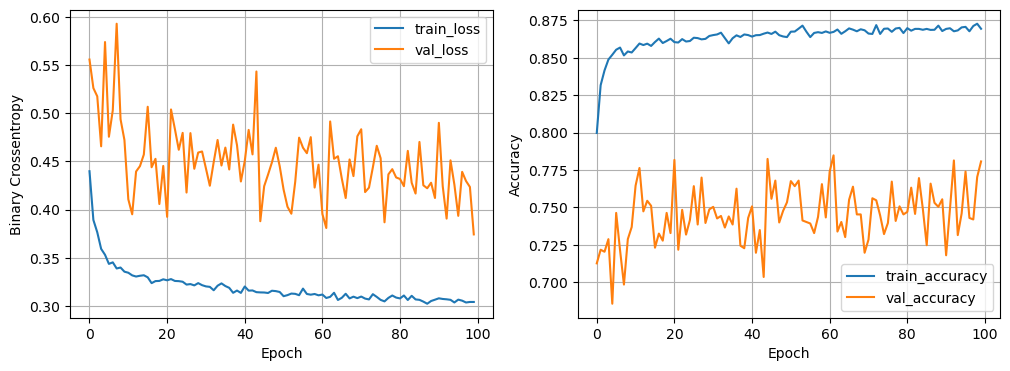

nodes=32, dropout=0.2, lr=0.005, batch_size=128


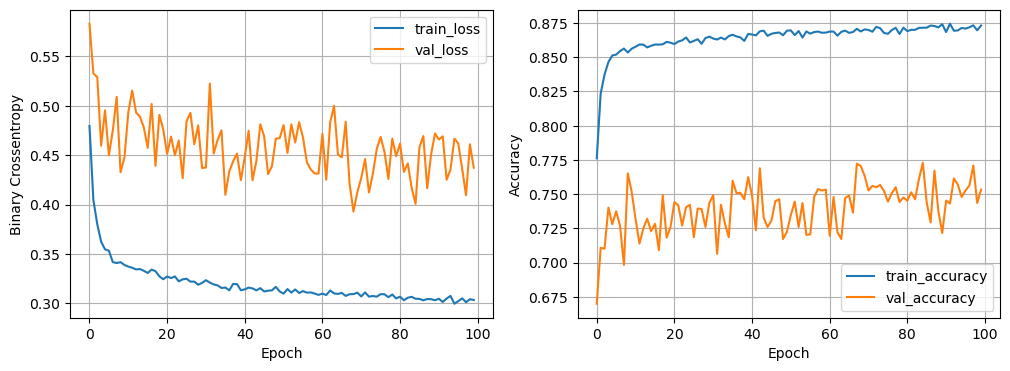

nodes=32, dropout=0.2, lr=0.001, batch_size=32


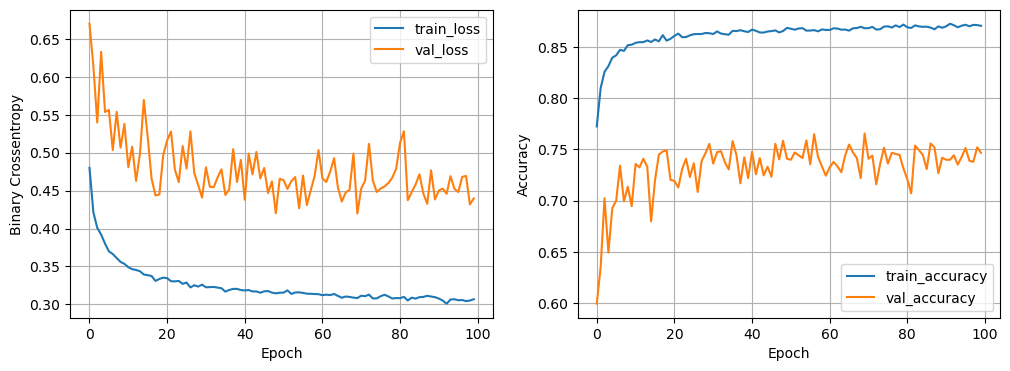

nodes=32, dropout=0.2, lr=0.001, batch_size=64


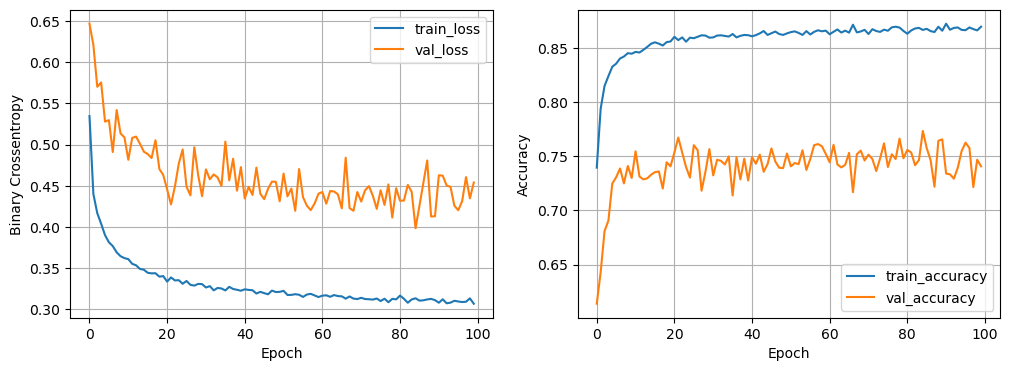

nodes=32, dropout=0.2, lr=0.001, batch_size=128


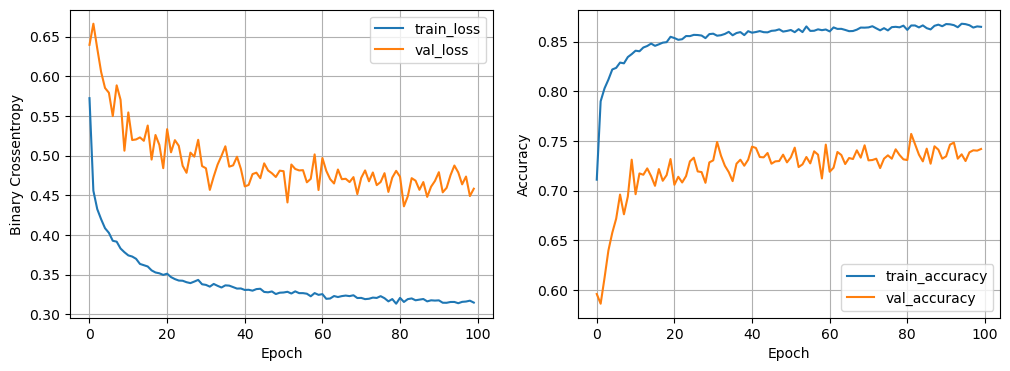

nodes=64, dropout=0.0, lr=0.01, batch_size=32


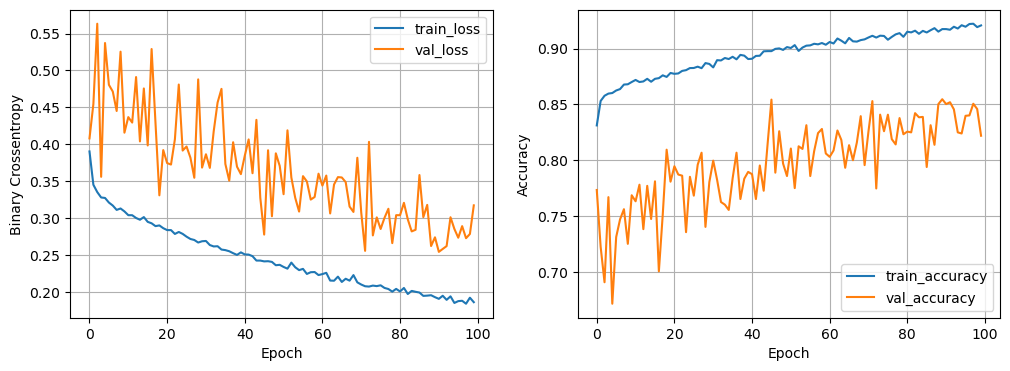

nodes=64, dropout=0.0, lr=0.01, batch_size=64


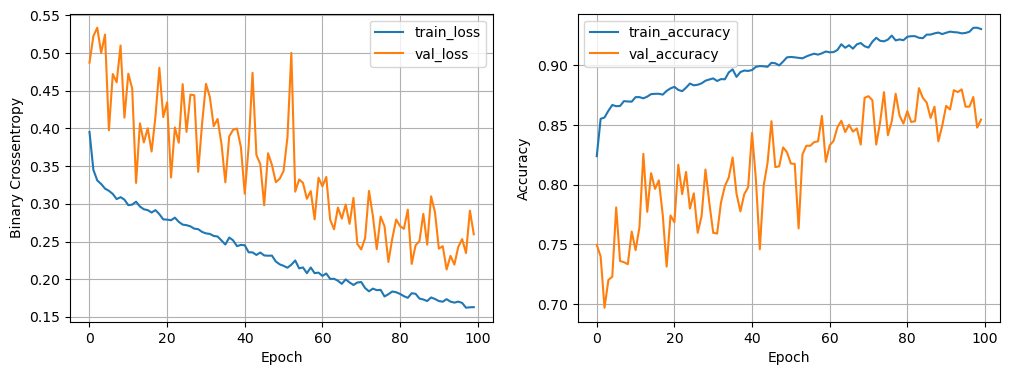

nodes=64, dropout=0.0, lr=0.01, batch_size=128


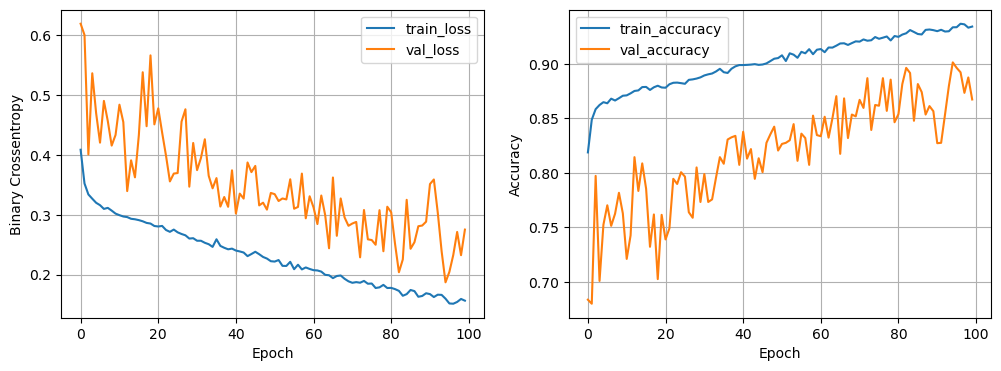

nodes=64, dropout=0.0, lr=0.005, batch_size=32


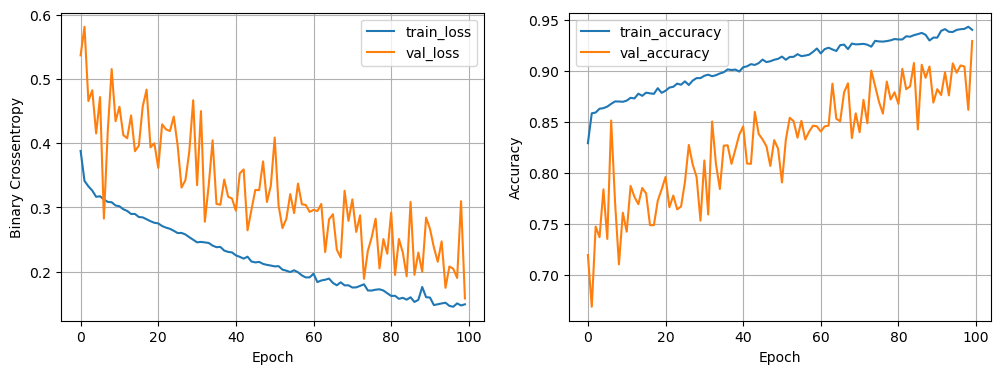

nodes=64, dropout=0.0, lr=0.005, batch_size=64


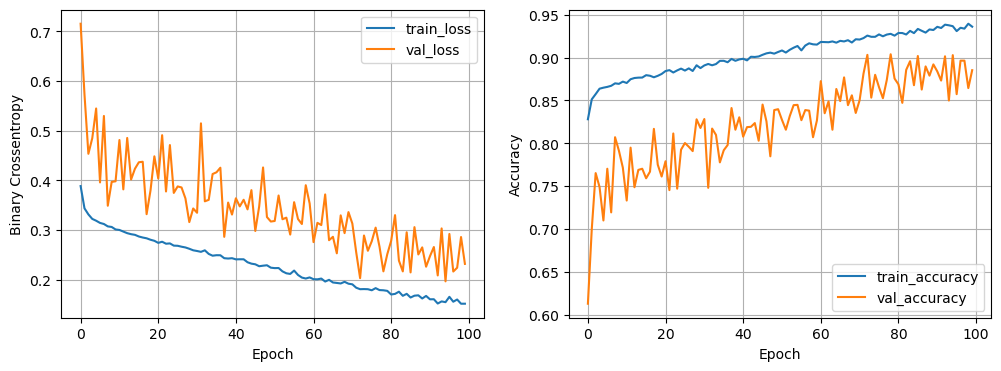

nodes=64, dropout=0.0, lr=0.005, batch_size=128


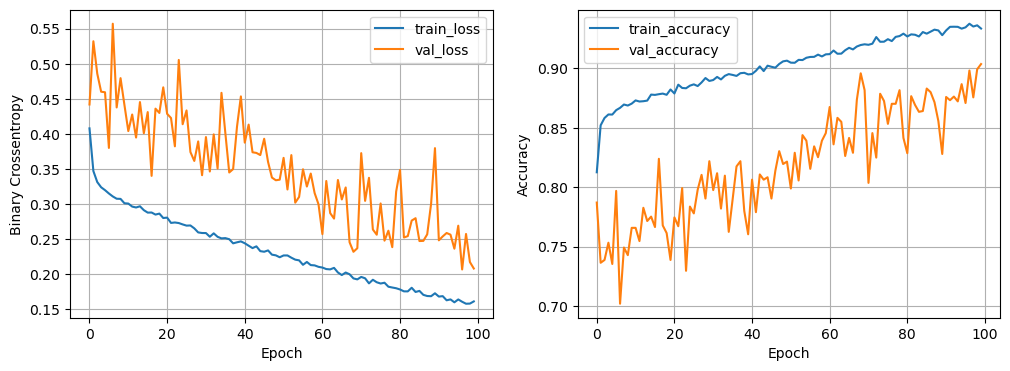

nodes=64, dropout=0.0, lr=0.001, batch_size=32


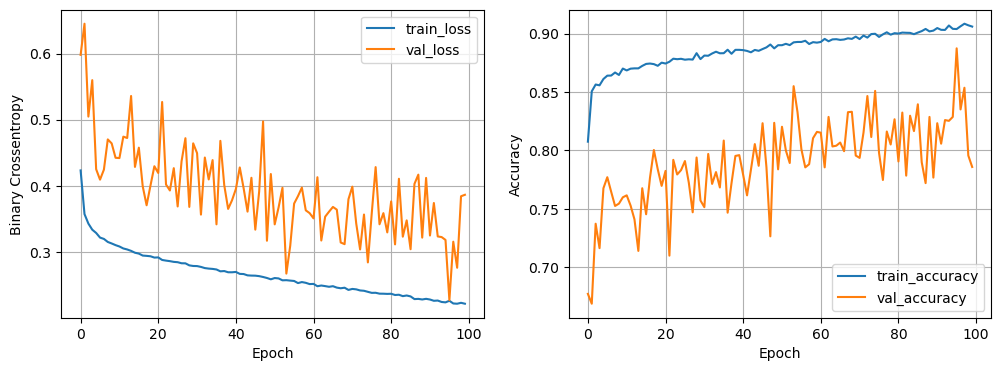

nodes=64, dropout=0.0, lr=0.001, batch_size=64


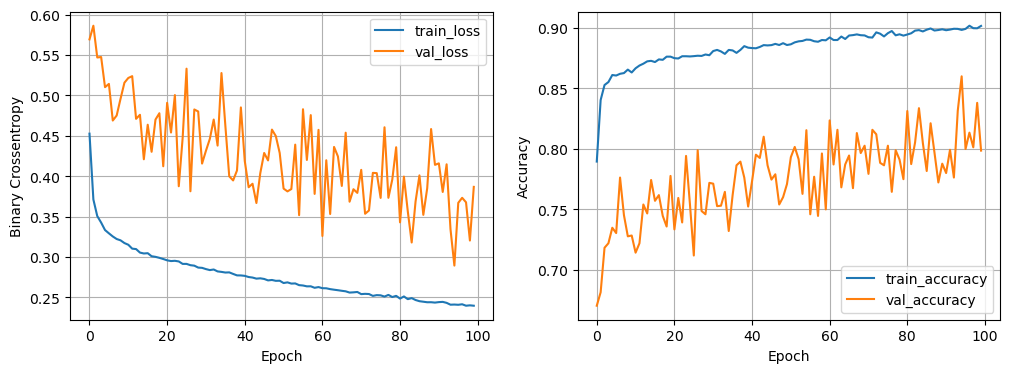

nodes=64, dropout=0.0, lr=0.001, batch_size=128


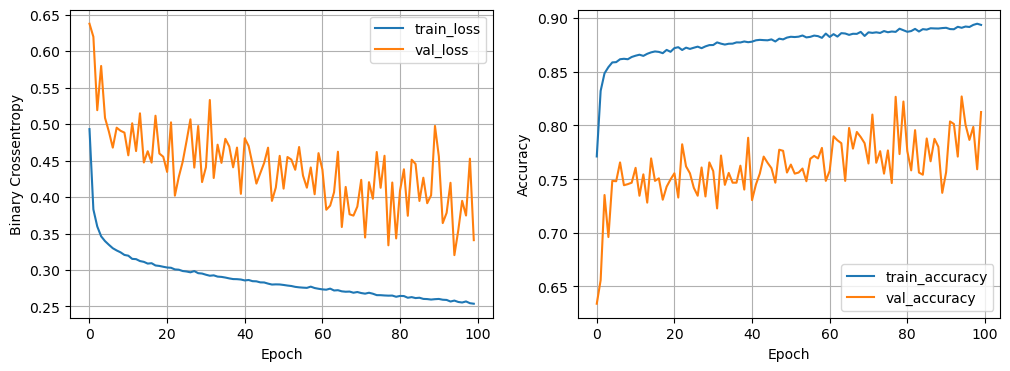

nodes=64, dropout=0.2, lr=0.01, batch_size=32


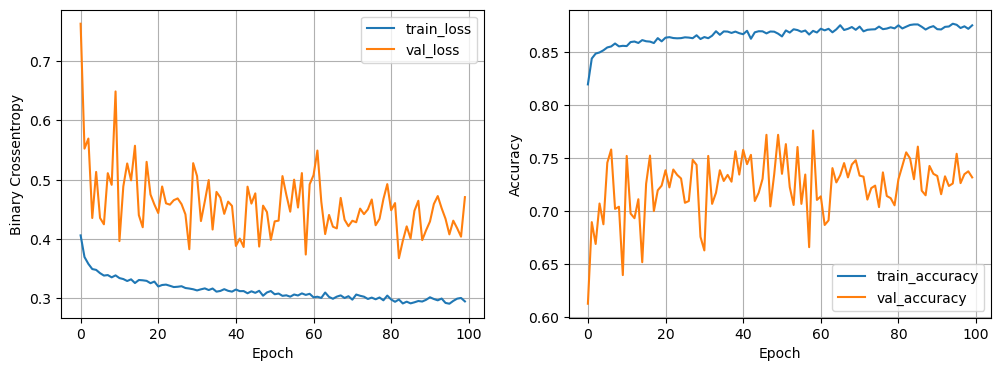

nodes=64, dropout=0.2, lr=0.01, batch_size=64


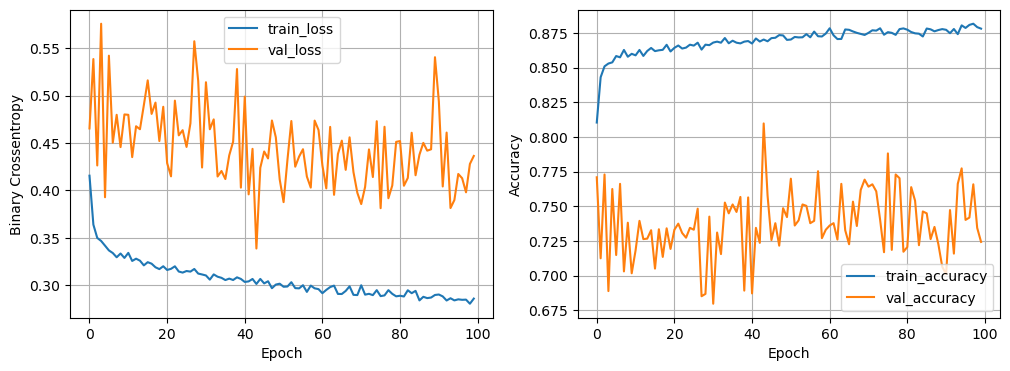

nodes=64, dropout=0.2, lr=0.01, batch_size=128


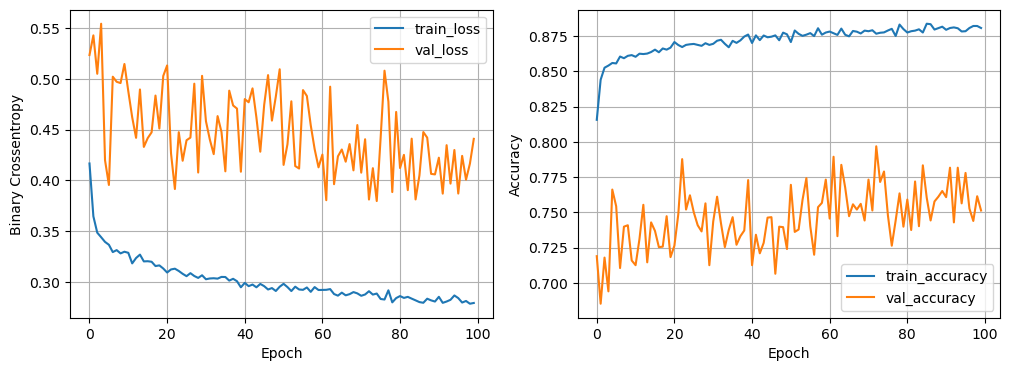

nodes=64, dropout=0.2, lr=0.005, batch_size=32


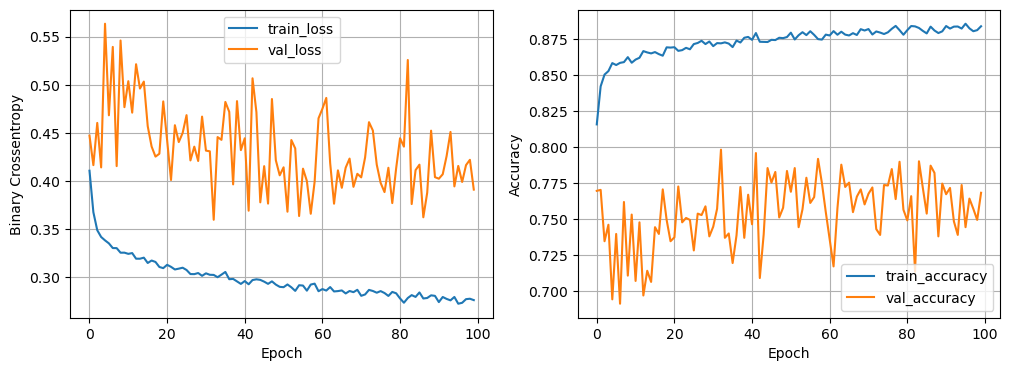

nodes=64, dropout=0.2, lr=0.005, batch_size=64


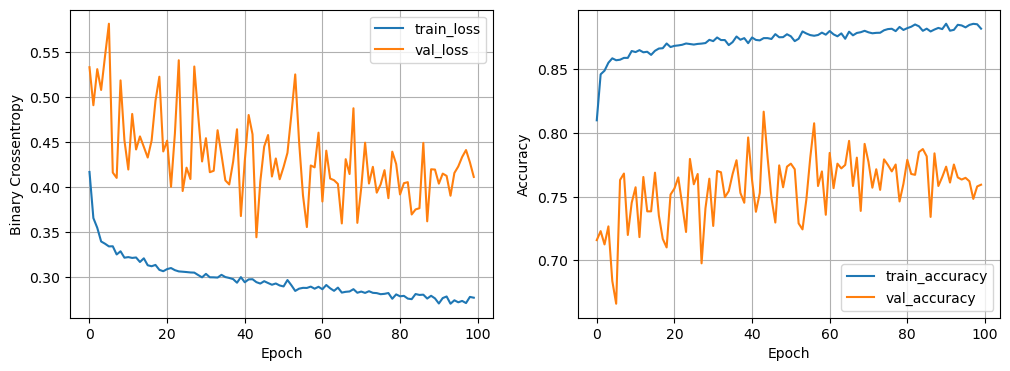

nodes=64, dropout=0.2, lr=0.005, batch_size=128


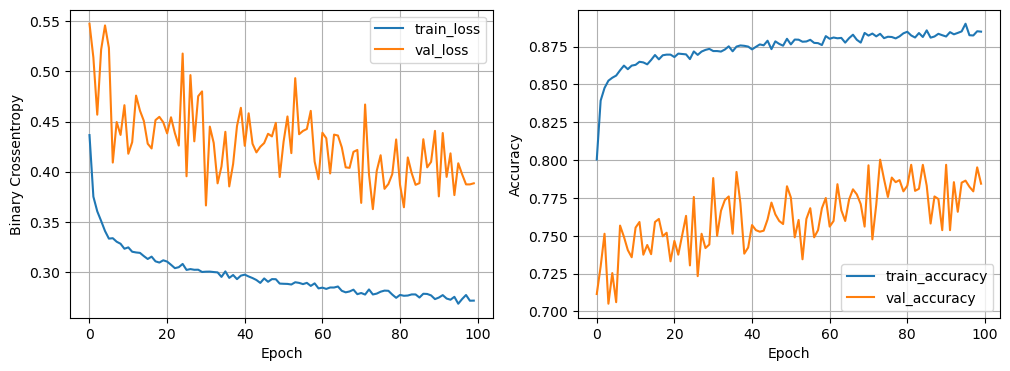

nodes=64, dropout=0.2, lr=0.001, batch_size=32


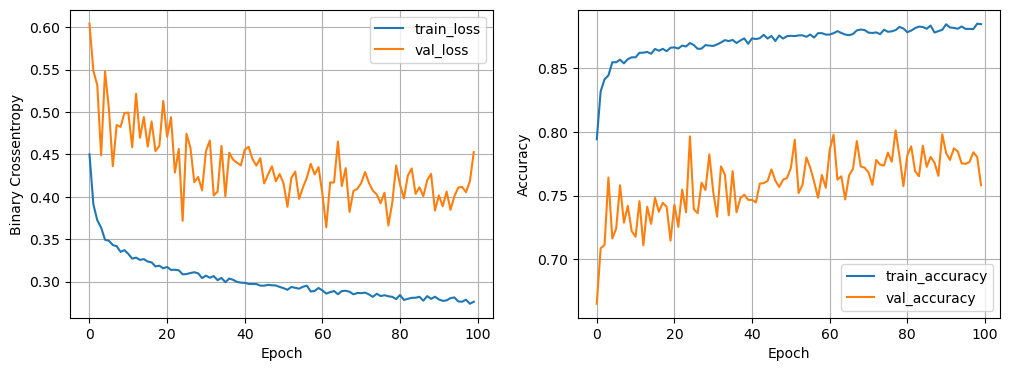

nodes=64, dropout=0.2, lr=0.001, batch_size=64


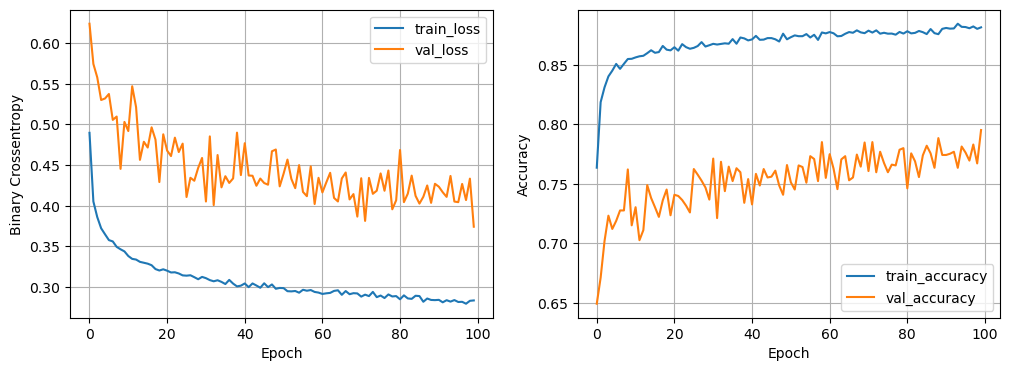

nodes=64, dropout=0.2, lr=0.001, batch_size=128


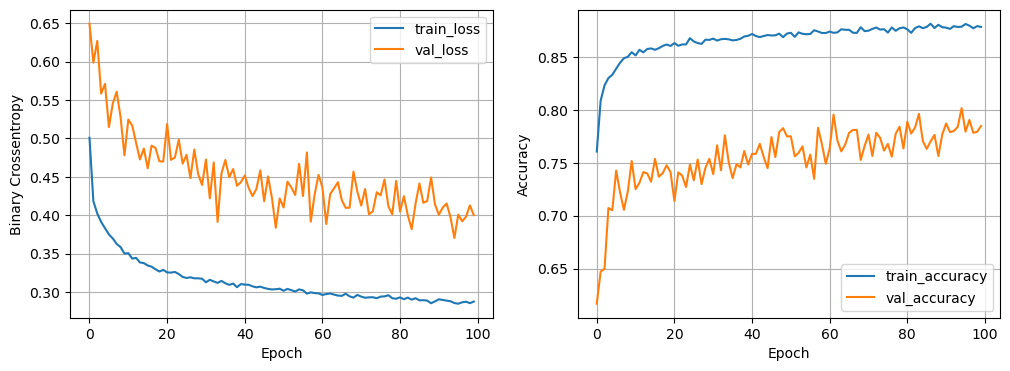

In [42]:
# Store the lowest validation loss found
least_val_loss = float('inf')

# Store the best performing model
best_model = None

# Number of epochs for training
epochs = 100

# Hyperparameter search
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:

                # Print current configuration
                print(
                    f"nodes={num_nodes}, dropout={dropout_prob}, "
                    f"lr={lr}, batch_size={batch_size}"
                )

                # Train model with given hyperparameters
                model, history = train_model(
                    x_train,
                    y_train,
                    num_nodes,
                    dropout_prob,
                    lr,
                    batch_size,
                    epochs
                )

                # Plot training history
                plot_history(history)

                # Evaluate model on validation data
                val_loss, val_accuracy = model.evaluate(
                    x_valid,
                    y_valid,
                    verbose=0
                )

                # Track the model with the lowest validation loss
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model

In [43]:
# Generate prediction probabilities from the best model
y_pred = best_model.predict(x_test)

# Convert probabilities to binary class labels
# If probability >= 0.5 → class 1
# If probability < 0.5  → class 0
y_pred = (y_pred >= 0.5).astype(int).reshape(-1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1331
           1       0.89      0.92      0.90      2473

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

